In [1]:
import pandas as pd
"""Load in the heart disease dataset from the UCI repository."""
data = pd.read_csv("D:/VSCode ProjectsRepos/BINF-5007-Materials/Assignment 2/Data/heart_disease_uci(1).csv")
heart_disease = data.copy()


In [2]:
"""Explore the dataset."""
# Display the first few rows of the dataset
print(heart_disease.head())
# Display the shape of the dataset
print("Shape of the dataset:", heart_disease.shape)
# Display the columns of the dataset
print("Columns in the dataset:", heart_disease.columns.tolist())
# Display the data types of each column
print("Data types of each column:\n", heart_disease.dtypes)


   age     sex    dataset               cp  trestbps   chol    fbs  \
0   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0  
Shape of the dataset: (920, 15)


In [3]:
"""Linear Regression Model to predic cholesterol levels.
1.Use R² and RMSE as evaluation metrics.
2. For linear regression:
     ■ Implement ElasticNet. Experiment with varying regularization
       parameters (alpha and l1_ratio) and observe their effects on model
       coefficients and performance.
3. Create a heatmap (see documentation for seaborn.heatmap) of R2 and RMSE
   across a range of alpha and l1_ratio. Use clear labels and a color bar to guide interpretation.
4. Identify the top-performing configuration based on the evaluation metrics.

"""
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import matplotlib.pyplot as plt






Columns with more than 50% missing values: ['ca', 'thal']
Columns removed due to exceeding 50% missing threshold: ['ca', 'thal']
_____________________Imputing Missing Values_____________________________
0
_____________________Checking Data for Duplicates_____________________________
_____________________Encoding and Normalizing the Data_____________________________
_____________________Removing Redunant Features_____________________________
               age  trestbps      chol    thalch   oldpeak       num
age       1.000000  0.268210  0.032017  0.320925  0.138624  0.267736
trestbps  0.268210  1.000000  0.091717  0.135423  0.173132  0.153533
chol      0.032017  0.091717  1.000000  0.222226  0.128547  0.197211
thalch    0.320925  0.135423  0.222226  1.000000  0.223019  0.374998
oldpeak   0.138624  0.173132  0.128547  0.223019  1.000000  0.371574
num       0.267736  0.153533  0.197211  0.374998  0.371574  1.000000
Redundant Columns to Drop : set()
Mean Squared Error: 5340.532442649077


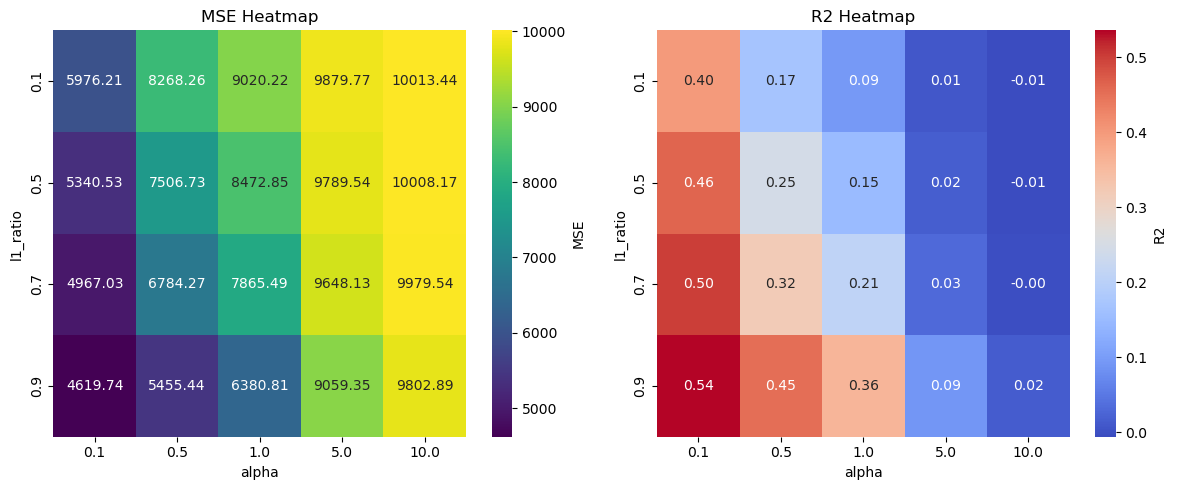

Best alpha: 0.1, Best l1_ratio: 0.9
Mean Squared Error with CV: 4619.742235776671
R-squared with CV: 0.5359124162778138


(ElasticNet(alpha=10.0, l1_ratio=0.9, random_state=42),
 array([102.87156821, 155.91952041, 267.17725849, 216.77235166,
        231.22539271, 226.92266257, 180.22563136, 175.49234822,
        250.37154441, 229.20872348, 214.52825673, 206.12882989,
        261.79473644, 177.92978394, 193.55798982, 207.43869903,
        239.91182018, 233.67991463, 237.87728966, 224.94347801,
        269.18876027, 204.49698624, 242.14446935, 219.90361925,
        220.6712845 , 222.91916257, 213.99781797, 180.91073152,
         68.4582689 , 173.54519411, 170.36985531, 234.08736859,
        244.01280115, 235.88001992, 256.95660308, 234.9439712 ,
        244.50592754, 250.19085843, 255.43301189, 238.00099425,
        265.08289119, 214.24007419, 207.80950771, 263.25593211,
        185.43135002, 203.98532642, 214.71223449, 217.04165496,
        252.59508253, 256.42974829, 187.98870838, 230.40222982,
         88.64161639, 180.78330899, 227.24928249, 213.3717395 ,
        213.57004369, 252.42742289, 183.39511071

In [ ]:
"""Data Preprocessing"""
import regression_models as reg_model
import data_preprocessor2 as dp


clean_heart_data = reg_model.clean_data(heart_disease)
clean_heart_data = dp.impute_missing_values(clean_heart_data,strategy='mean',target_col='chol')
clean_heart_data = dp.remove_outliers(clean_heart_data, target_col='chol')
clean_heart_data = dp.remove_redundant_features(clean_heart_data)
clean_heart_data.to_csv('D:/VSCode ProjectsRepos/BINF-5007-Materials/Assignment 2/Data/encoded_heart_disease_data.csv', index=False)

reg_model.elastic_net_regression(clean_heart_data,target_col='chol')





In [ ]:


ElasticNetCV?


Init signature:
ElasticNetCV(
    *,
    l1_ratio=0.5,
    eps=0.001,
    n_alphas=100,
    alphas=None,
    fit_intercept=True,
    precompute='auto',
    max_iter=1000,
    tol=0.0001,
    cv=None,
    copy_X=True,
    verbose=0,
    n_jobs=None,
    positive=False,
    random_state=None,
    selection='cyclic',
)
Docstring:     
Elastic Net model with iterative fitting along a regularization path.

See glossary entry for :term:`cross-validation estimator`.

Read more in the :ref:`User Guide <elastic_net>`.

Parameters
----------
l1_ratio : float or list of float, default=0.5
    Float between 0 and 1 passed to ElasticNet (scaling between
    l1 and l2 penalties). For ``l1_ratio = 0``
    the penalty is an L2 penalty. For ``l1_ratio = 1`` it is an L1 penalty.
    For ``0 < l1_ratio < 1``, the penalty is a combination of L1 and L2
    This parameter can be a list, in which case the different
    values are tested by cross-validation and the one giving the best
    prediction score is 